# Test on real data

In [1]:
# Load libraries
from palmerpenguins import load_penguins
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import time
from sklearn.preprocessing import LabelEncoder

In [2]:
# Import written libraries
import src.utils as ut
import src.fuzz as fz
import src.classif as cl

## Iris dataset

In [3]:
iris = load_iris(as_frame=True)  # returns a dict-like object
df = iris.frame  # get as pandas DataFrame

In [4]:
X = df.drop(columns='target')  # features
y = df['target']  # target

# Turn into array
X = np.array(X)
y = np.array(y)

In [5]:
# Hyperparameters
dim = X.shape[1]  # number of features
nb_classes = len(np.unique(y))  # number of classes

# Normalize data
data_norm = fz.batch_norm(X)
data_labels = ut.convert_to_float_lst(y)
print(f"Normalized data: {data_norm.shape[0]} samples in {data_norm.shape[1]}D space.")

Normalized data: 150 samples in 4D space.


[0, 0.07972278065597072, 0.14523529102730826, 0.26899102794577556, 0.27941437447069295, 0.45368054879179265, 0.5365074748093477, 0.6677054852982119, 0.7027125457172357, 0.7390511615381907, 0.7399262995607763, 0.7947202909365448, 0.8151432224163507, 0.8326652309024745, 0.8598655205033421, 0.9164056383296789]
Leave one out avec k = 1
SimLevel1: 0.3333333333333333
SimLevel2: 0.4266666666666667
SimLevel3: 0.3333333333333333

Result in 3.2080 seconds.
[0, 0.12890446136867273, 0.3746644257637277, 0.41418473656404275, 0.4271227448551749, 0.4823283044647736, 0.5198895585902708, 0.5285047427947734, 0.5443425946061367, 0.5589303164191348, 0.607287315652502, 0.6997942347167538, 0.7215944165093645, 0.8748600151743702, 0.9229994998526923, 0.9628828212316893]
Leave one out avec k = 2
SimLevel1: 0.37333333333333335
SimLevel2: 0.5266666666666666
SimLevel3: 0.37333333333333335

Result in 3.1737 seconds.
[0, 0.06809938946198713, 0.09892295456433842, 0.12677768415021717, 0.13555603475909694, 0.2694067737

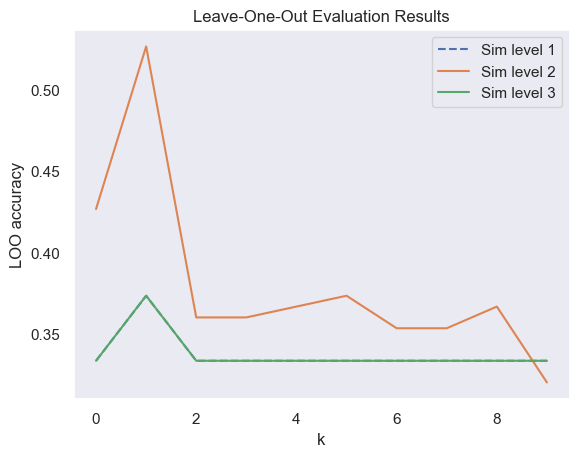

In [6]:
# LOO evaluation
# Define list for each sim level
l1 = []
l2 = []
l3 = []
k = 10

for k in range(1, k+1): 
    tic = time.time()
    mu = fz.generate_capacity(ut.enumerate_permute_batch(data_norm[0]),2**len(data_norm[0])-1)
    print(mu)

    print(f"Leave one out avec k = {k}")
    
    # SimLevel1
    res = cl.leave_one_out(
            C = cl.KNNFuzz(input_dimension=data_norm.shape[1],mu=mu, k=k, sim=fz.SimLevel1), 
            DS = (data_norm, data_labels)
        )
    l1.append(res)
    print(f"SimLevel1: {res}")
    # Sim level 2
    res = cl.leave_one_out(
            C = cl.KNNFuzz(input_dimension=data_norm.shape[1],mu=mu, k=k, sim=fz.SimLevel2), 
            DS = (data_norm, data_labels)
        )
    l2.append(res)
    print(f"SimLevel2: {res}")

    # Sim level 3
    res = cl.leave_one_out(
            C = cl.KNNFuzz(input_dimension=data_norm.shape[1],mu=mu, k=k, sim=fz.SimLevel3), 
            DS = (data_norm, data_labels)
        )
    l3.append(res)
    print(f"SimLevel3: {res}\n")

    toc = time.time()
    print(f"Result in {(toc-tic):0.4f} seconds.")

# Plot results
plt.plot(l1, label="Sim level 1", linestyle='dashed')
plt.plot(l2, label="Sim level 2")
plt.plot(l3, label="Sim level 3")

# Config additional params
plt.ylabel("LOO accuracy")
plt.xlabel(r"k")
plt.title("Leave-One-Out Evaluation Results")
plt.grid()
plt.legend()
plt.savefig("archive/iris_accuracy.png")

In [7]:
penguins = load_penguins()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [8]:
le = LabelEncoder()
le.fit(penguins['island'])
penguins['island'] = le.transform(penguins['island'])

le.fit(penguins['sex'])
penguins['sex'] = le.transform(penguins['sex'])

In [9]:
le.fit(penguins['species'])
penguins['species'] = le.transform(penguins['species'])

In [10]:
penguins = penguins.dropna()  # remove rows with missing values
X = penguins.drop(columns='species')  # features
y = penguins['species']  # target

# Turn into array
X = np.array(X)
y = np.array(y)

In [11]:
# Hyperparameters
dim = X.shape[1]  # number of features
nb_classes = len(np.unique(y))  # number of classes

# Normalize data
data_norm = fz.batch_norm(X)
data_labels = ut.convert_to_float_lst(y)
print(f"Normalized data: {data_norm.shape[0]} samples in {data_norm.shape[1]}D space.")

Normalized data: 342 samples in 7D space.


[0, 0.03264009541900248, 0.03369746629706627, 0.03926919797489381, 0.046822056064683815, 0.052794616050542253, 0.055456325109627835, 0.05601279713948293, 0.07134442234407523, 0.09175313355021963, 0.09431254530646604, 0.1031325328274435, 0.108211302051617, 0.11440980106605181, 0.11763154509138574, 0.13520432548742578, 0.1374840806079769, 0.14788735462320757, 0.16183499022917802, 0.1668032519330015, 0.17761938208196393, 0.17809102506069796, 0.17956214512281843, 0.1912361815639697, 0.20359107223898465, 0.2067005300131579, 0.20979924269100525, 0.21555093733754882, 0.2194153945388515, 0.22769728769272857, 0.23070960634453563, 0.23202825469014576, 0.23367170324133735, 0.25390129835217634, 0.2655477300044281, 0.2709349332606318, 0.2858975129917426, 0.2954157524318193, 0.30459009488867395, 0.305731873112129, 0.30809976702240127, 0.314244165710757, 0.31753527658316927, 0.33352605177560124, 0.3416260921245785, 0.34333533474745503, 0.3456225838270147, 0.348020918785633, 0.34813793430800155, 0.360

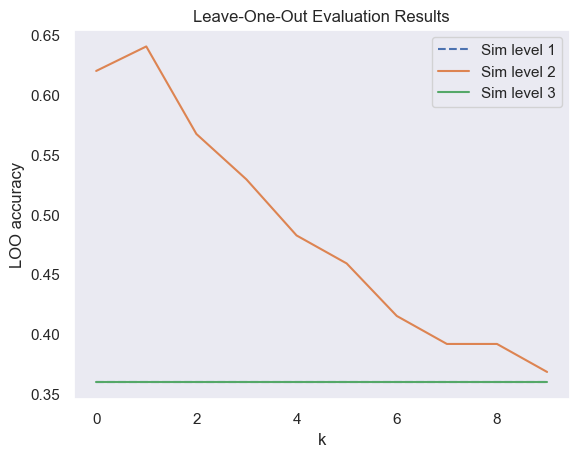

In [12]:
# LOO evaluation
# Define list for each sim level
l1 = []
l2 = []
l3 = []
k = 10

for k in range(1, k+1): 
    tic = time.time()
    mu = fz.generate_capacity(ut.enumerate_permute_batch(data_norm[0]),2**len(data_norm[0])-1)
    print(mu)

    print(f"Leave one out avec k = {k}")
    
    # SimLevel1
    res = cl.leave_one_out(
            C = cl.KNNFuzz(input_dimension=data_norm.shape[1],mu=mu, k=k, sim=fz.SimLevel1), 
            DS = (data_norm, data_labels)
        )
    l1.append(res)
    print(f"SimLevel1: {res}")
    # Sim level 2
    res = cl.leave_one_out(
            C = cl.KNNFuzz(input_dimension=data_norm.shape[1],mu=mu, k=k, sim=fz.SimLevel2), 
            DS = (data_norm, data_labels)
        )
    l2.append(res)
    print(f"SimLevel2: {res}")

    # Sim level 3
    res = cl.leave_one_out(
            C = cl.KNNFuzz(input_dimension=data_norm.shape[1],mu=mu, k=k, sim=fz.SimLevel3), 
            DS = (data_norm, data_labels)
        )
    l3.append(res)
    print(f"SimLevel3: {res}\n")

    toc = time.time()
    print(f"Result in {(toc-tic):0.4f} seconds.")

# Plot results
plt.plot(l1, label="Sim level 1", linestyle='dashed')
plt.plot(l2, label="Sim level 2")
plt.plot(l3, label="Sim level 3")

# Config additional params
plt.ylabel("LOO accuracy")
plt.xlabel(r"k")
plt.title("Leave-One-Out Evaluation Results")
plt.grid()
plt.legend()
plt.savefig("archive/iris_accuracy.png")